# GPR #02

## IMPORT DATASETS AND LIBRARIES with EDA (correlation etc.)


In [1]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import plotly.express as px
from copy import copy
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import plotly.figure_factory as ff
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error, accuracy_score
from tensorflow import keras
from math import sqrt
import plotly.io as pio

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [3]:
# Read stock prices data
stock_price_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/stock.csv')

# Sort based on Date
stock_price_df = stock_price_df.sort_values(by=['Date'])
stock_price_df

Date        AAPL          BA  ...         TSLA         GOOG        sp500
0     2012-01-12   60.198570   75.510002  ...    28.250000   313.644379  1295.500000
1     2012-01-13   59.972858   74.599998  ...    22.790001   311.328064  1289.089966
2     2012-01-17   60.671429   75.239998  ...    26.600000   313.116364  1293.670044
3     2012-01-18   61.301430   75.059998  ...    26.809999   315.273285  1308.040039
4     2012-01-19   61.107143   75.559998  ...    26.760000   318.590851  1314.500000
...          ...         ...         ...  ...          ...          ...          ...
2154  2020-08-05  440.250000  174.279999  ...  1485.020020  1473.609985  3327.770020
2155  2020-08-06  455.609985  172.199997  ...  1489.579956  1500.099976  3349.159912
2156  2020-08-07  444.450012  170.020004  ...  1452.709961  1494.489990  3351.280029
2157  2020-08-10  450.910004  179.410004  ...  1418.569946  1496.099976  3360.469971
2158  2020-08-11  437.500000  180.130005  ...  1374.390015  1480.319946  3333.689941

[2159 rows x 10 columns]

In [4]:
# Read the stocks volume data
stock_vol_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/stock_volume.csv')

# Sort the volume data based on Date
stock_vol_df = stock_vol_df.sort_values(by = ['Date'])
stock_vol_df

Date      AAPL        BA  ...     TSLA      GOOG       sp500
0     2012-01-12  53146800   3934500  ...   729300   3764400  4019890000
1     2012-01-13  56505400   4641100  ...  5500400   4631800  3692370000
2     2012-01-17  60724300   3700100  ...  4651600   3832800  4010490000
3     2012-01-18  69197800   4189500  ...  1260200   5544000  4096160000
4     2012-01-19  65434600   5397300  ...  1246300  12657800  4465890000
...          ...       ...       ...  ...      ...       ...         ...
2154  2020-08-05  30498000  46551000  ...  4978000   1979500  4732220000
2155  2020-08-06  50607200  32921600  ...  5992300   1995400  4267490000
2156  2020-08-07  49453300  19301600  ...  8883500   1576600  4104860000
2157  2020-08-10  53100900  35857700  ...  7522300   1289300  4318570000
2158  2020-08-11  46871100  60966900  ...  8356000   1452000  5087650000

[2159 rows x 10 columns]

In [5]:
# Check Null values
stock_price_df.isnull().sum()

Date     0
AAPL     0
BA       0
T        0
MGM      0
AMZN     0
IBM      0
TSLA     0
GOOG     0
sp500    0
dtype: int64

In [6]:
# Check Null values
stock_vol_df.isnull().sum()

Date     0
AAPL     0
BA       0
T        0
MGM      0
AMZN     0
IBM      0
TSLA     0
GOOG     0
sp500    0
dtype: int64

In [7]:
# Get stock prices dataframe info
stock_price_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2159 entries, 0 to 2158
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2159 non-null   object 
 1   AAPL    2159 non-null   float64
 2   BA      2159 non-null   float64
 3   T       2159 non-null   float64
 4   MGM     2159 non-null   float64
 5   AMZN    2159 non-null   float64
 6   IBM     2159 non-null   float64
 7   TSLA    2159 non-null   float64
 8   GOOG    2159 non-null   float64
 9   sp500   2159 non-null   float64
dtypes: float64(9), object(1)
memory usage: 185.5+ KB


In [8]:
# Get stock volume dataframe info
stock_vol_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2159 entries, 0 to 2158
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    2159 non-null   object
 1   AAPL    2159 non-null   int64 
 2   BA      2159 non-null   int64 
 3   T       2159 non-null   int64 
 4   MGM     2159 non-null   int64 
 5   AMZN    2159 non-null   int64 
 6   IBM     2159 non-null   int64 
 7   TSLA    2159 non-null   int64 
 8   GOOG    2159 non-null   int64 
 9   sp500   2159 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 185.5+ KB


In [9]:
stock_price_df.describe()

AAPL           BA  ...         GOOG        sp500
count  2159.000000  2159.000000  ...  2159.000000  2159.000000
mean    140.819823   189.942700  ...   783.712512  2218.749554
std      70.827601   103.678586  ...   334.448057   537.321727
min      55.790001    67.239998  ...   278.481171  1278.040039
25%      89.165714   124.015000  ...   527.214416  1847.984985
50%     116.599998   142.419998  ...   737.599976  2106.629883
75%     175.019997   297.044998  ...  1079.744995  2705.810059
max     455.609985   440.619995  ...  1568.489990  3386.149902

[8 rows x 9 columns]

In [10]:
stock_vol_df.describe()

AAPL            BA  ...          GOOG         sp500
count  2.159000e+03  2.159000e+03  ...  2.159000e+03  2.159000e+03
mean   5.820332e+07  6.419916e+06  ...  2.498238e+06  3.680732e+09
std    4.568141e+07  9.711873e+06  ...  1.928407e+06  8.622717e+08
min    1.136200e+07  7.889000e+05  ...  7.900000e+03  1.248960e+09
25%    2.769930e+07  3.031850e+06  ...  1.325400e+06  3.211890e+09
50%    4.209420e+07  3.991000e+06  ...  1.813900e+06  3.526890e+09
75%    7.182480e+07  5.325900e+06  ...  3.245350e+06  3.933290e+09
max    3.765300e+08  1.032128e+08  ...  2.497790e+07  9.044690e+09

[8 rows x 9 columns]

In [11]:
# Function to normalize stock prices
def normalize(df):
  x = df.copy()
  for i in x.columns[1:]:
    x[i] = x[i]/x[i][0]
  return x

In [12]:
# Function to plot interactive plots
def plotly_plot(df, title):
  fig = px.line(title=title)
  for i in df.columns[1:]:
      fig.add_scatter(x=df['Date'], y=df[i], name=i)
  fig.show()


In [13]:
plotly_plot(stock_price_df, "Stock Prices")

In [14]:
plotly_plot(stock_vol_df, "Stocks Volume")

In [15]:
plotly_plot(normalize(stock_vol_df), "Normalized Stocks Volume")

In [16]:
plotly_plot(normalize(stock_price_df), "Normalized Stocks Prices")

In [17]:
def daily_return(df):
  df_daily_return = df.copy()

  for i in df.columns[1:]:
    for j in range(1, len(df)):
      df_daily_return[i][j] = ((df[i][j] - df[i][j-1]) / df[i][j-1]) * 100
    df_daily_return[i][0] = 0

  return df_daily_return

In [18]:
# Get the daily returns 
stocks_daily_return = daily_return(stock_price_df)
stocks_daily_return

Date      AAPL        BA  ...       TSLA      GOOG     sp500
0     2012-01-12  0.000000  0.000000  ...   0.000000  0.000000  0.000000
1     2012-01-13 -0.374946 -1.205144  ... -19.327430 -0.738516 -0.494792
2     2012-01-17  1.164812  0.857909  ...  16.717854  0.574410  0.355295
3     2012-01-18  1.038382 -0.239234  ...   0.789470  0.688856  1.110793
4     2012-01-19 -0.316937  0.666134  ...  -0.186494  1.052283  0.493866
...          ...       ...       ...  ...        ...       ...       ...
2154  2020-08-05  0.362467  5.579446  ...  -0.133153  0.589774  0.642974
2155  2020-08-06  3.488923 -1.193483  ...   0.307062  1.797626  0.642770
2156  2020-08-07 -2.449458 -1.265966  ...  -2.475194 -0.373974  0.063303
2157  2020-08-10  1.453480  5.522880  ...  -2.350092  0.107728  0.274222
2158  2020-08-11 -2.973987  0.401316  ...  -3.114399 -1.054744 -0.796913

[2159 rows x 10 columns]

In [19]:
plotly_plot(stocks_daily_return, 'Daily Returns Interactive')

In [20]:
stocks_daily_return.describe()

AAPL           BA  ...         GOOG        sp500
count  2159.000000  2159.000000  ...  2159.000000  2159.000000
mean      0.107695     0.065907  ...     0.084392     0.049316
std       1.775768     2.259817  ...     1.585558     1.048843
min     -12.864695   -23.848412  ...   -11.100820   -11.984055
25%      -0.692402    -0.784088  ...    -0.613768    -0.318606
50%       0.081097     0.077990  ...     0.060309     0.059362
75%       1.001854     0.946515  ...     0.860845     0.501914
max      11.980826    24.318606  ...    16.052431     9.382774

[8 rows x 9 columns]

In [21]:
# Daily Return Correlation
cm = stocks_daily_return.drop(columns = ['Date']).corr()

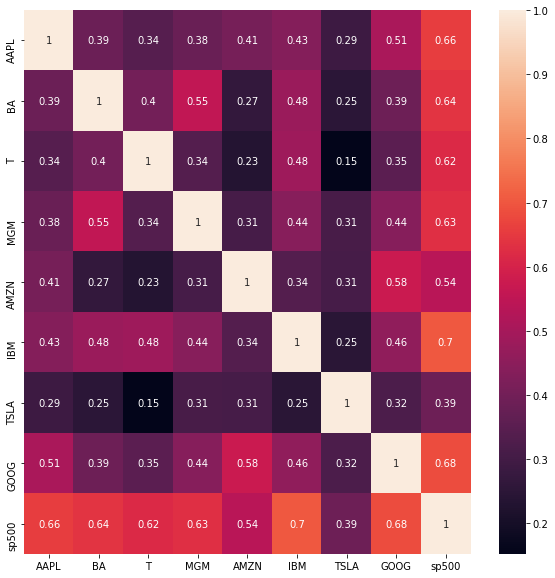

In [22]:
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3754def1d0>,
      dtype=object)

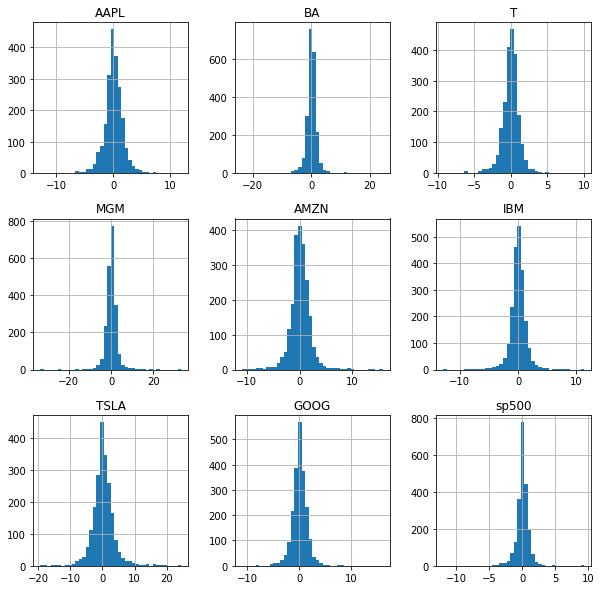

In [23]:
# Histogram of daily returns
# Stock returns are normally distributed with zero mean 
stocks_daily_return.hist(figsize = (10,10), bins = 40)

## PREPARE THE DATA

In [24]:
# Function to concatenate the date, stock price, and volume in one dataframe
def individual_stock(price_df, vol_df, name):
  return pd.DataFrame({'Date': price_df['Date'], 'Close':price_df[name], 'Volume': vol_df[name]   })

In [25]:
# Function to return the input/output (target) data for AI/ML Model
# Note that our goal is to predict the future stock price 
 
def trading_window(data):
   n = 5
   data['Target'] = data[['Close']].shift(-n)
   return data

In [26]:
# Let's test the functions and get individual stock prices and volumes for AAPL
price_volume_df = individual_stock(stock_price_df, stock_vol_df, 'TSLA')
price_volume_df 

Date        Close   Volume
0     2012-01-12    28.250000   729300
1     2012-01-13    22.790001  5500400
2     2012-01-17    26.600000  4651600
3     2012-01-18    26.809999  1260200
4     2012-01-19    26.760000  1246300
...          ...          ...      ...
2154  2020-08-05  1485.020020  4978000
2155  2020-08-06  1489.579956  5992300
2156  2020-08-07  1452.709961  8883500
2157  2020-08-10  1418.569946  7522300
2158  2020-08-11  1374.390015  8356000

[2159 rows x 3 columns]

In [27]:
price_volume_target_df = trading_window(price_volume_df)

# Remove the last 5 rows as it will be a null valuue
price_volume_target_df = price_volume_target_df[:-5]
price_volume_target_df

Date        Close    Volume       Target
0     2012-01-12    28.250000    729300    26.600000
1     2012-01-13    22.790001   5500400    26.770000
2     2012-01-17    26.600000   4651600    27.420000
3     2012-01-18    26.809999   1260200    27.969999
4     2012-01-19    26.760000   1246300    28.940001
...          ...          ...       ...          ...
2149  2020-07-29  1499.109985   9426900  1485.020020
2150  2020-07-30  1487.489990   7621000  1489.579956
2151  2020-07-31  1430.760010  12247000  1452.709961
2152  2020-08-03  1485.000000   8809300  1418.569946
2153  2020-08-04  1487.000000   8415000  1374.390015

[2154 rows x 4 columns]

In [28]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
price_volume_target_scaled_df = sc.fit_transform(price_volume_target_df.drop(columns=['Date']))

In [29]:
price_volume_target_scaled_df

array([[3.36993291e-03, 6.01579228e-03, 3.09233719e-04],
       [0.00000000e+00, 8.47807389e-02, 4.14373183e-04],
       [2.35154641e-03, 7.07681031e-02, 8.16377018e-04],
       ...,
       [8.69004641e-01, 1.96158742e-01, 8.82311807e-01],
       [9.02481777e-01, 1.39406576e-01, 8.61197320e-01],
       [9.03716185e-01, 1.32897172e-01, 8.33873471e-01]])

In [30]:
# Create Feature and Target
X = price_volume_target_scaled_df[:, 0:2]
y = price_volume_target_scaled_df[:, 2:]

In [31]:
split = int(0.5 * len(X))
split

1077

In [32]:
X_train = X[:split]
y_train = y[:split]
X_test = X[split:]
y_test = y[split:]


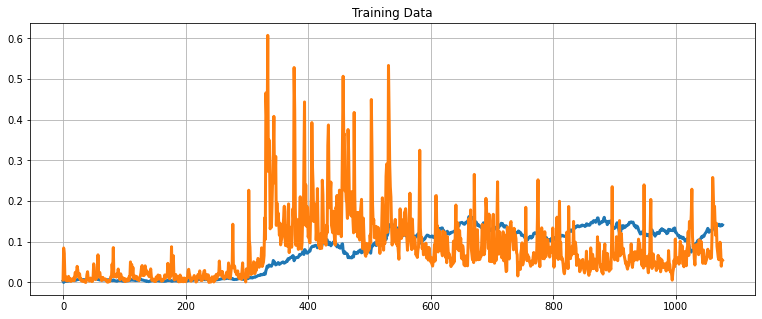

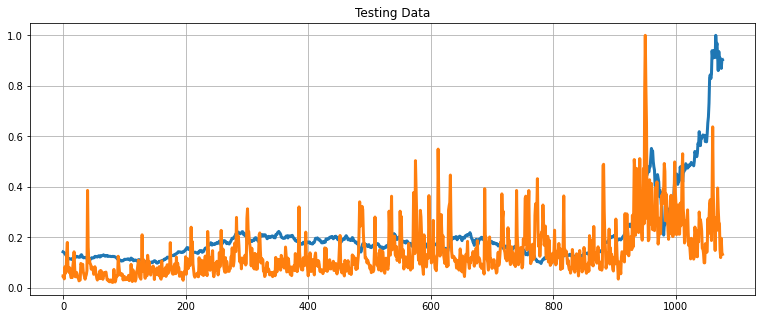

In [33]:
def show_plot(data, title):
  plt.figure(figsize=(13,5))
  plt.plot(data, linewidth = 3)
  plt.title(title)
  plt.grid()

show_plot(X_train, 'Training Data')
show_plot(X_test, 'Testing Data')



## RIDGE LINEAR REGRESSION MODEL (TSLA)

In [34]:
from sklearn.linear_model import Ridge

# Create and train the Ridge Linear Regression  Model
regression_model = Ridge(alpha=1)

regression_model.fit(X_train, y_train)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [35]:
# Make Prediction
predicted_prices = regression_model.predict(X)

In [36]:
predicted = []

for i in predicted_prices:
  predicted.append(i[0])

In [37]:
close = []
for i in price_volume_target_scaled_df:
  close.append(i[0])
  


In [38]:
df_predicted = price_volume_target_df[['Date']]

In [39]:
# Add the close values to the dataframe
df_predicted['Close'] = close

In [40]:
# Add the predicted values to the dataframe
df_predicted['Prediction'] = predicted
df_predicted

Date     Close  Prediction
0     2012-01-12  0.003370    0.018465
1     2012-01-13  0.000000    0.019996
2     2012-01-17  0.002352    0.021016
3     2012-01-18  0.002481    0.018256
4     2012-01-19  0.002450    0.018222
...          ...       ...         ...
2149  2020-07-29  0.911191    0.695176
2150  2020-07-30  0.904019    0.688367
2151  2020-07-31  0.869005    0.666443
2152  2020-08-03  0.902482    0.688234
2153  2020-08-04  0.903716    0.688812

[2154 rows x 3 columns]

In [41]:
plotly_plot(df_predicted, "Original vs Predictions Ridge (TSLA)")

In [42]:
# Test the model and calculate its accuracy 
lr_accuracy = regression_model.score(X_test, y_test)
print('Ridge Regression Score:', lr_accuracy)

Ridge Regression Score: 0.843240989712242


In [43]:
rmse_ridge = sqrt(mean_squared_error(close, predicted))

print('Ridge RMSE:', rmse_ridge)

Ridge RMSE: 0.035131452629995376


## ARIMA Model (TSLA)

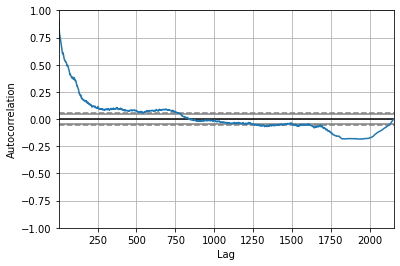

In [44]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(X)

In [45]:
history = []
for i in X_train:
  history.append(i[0])

In [46]:

predictions = []
model = ARIMA(history, order=(1,1,0))
model_fit = model.fit(disp=0)
yhat = model_fit.forecast()[0]
predictions.append(yhat)
history.append(y[0])
# rolling forecasts
for i in range(1, len(y)):
    # predict
    model = ARIMA(history, order=(1,1,0))
    model_fit = model.fit(disp=0)
    yhat = model_fit.forecast()[0]
    # invert transformed prediction
    predictions.append(yhat)
    # observation
    obs = y[i]
    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/pyth

In [47]:
df_predicted_arima = df_predicted

In [48]:
predictions_arima = []
for i in predictions:
  predictions_arima.append(i[0])

In [49]:
df_predicted_arima['Prediction'] = predictions_arima
df_predicted_arima

Date     Close  Prediction
0     2012-01-12  0.003370    0.141458
1     2012-01-13  0.000000   -0.005205
2     2012-01-17  0.002352    0.000413
3     2012-01-18  0.002481    0.000819
4     2012-01-19  0.002450    0.001159
...          ...       ...         ...
2149  2020-07-29  0.911191    0.903783
2150  2020-07-30  0.904019    0.902596
2151  2020-07-31  0.869005    0.905355
2152  2020-08-03  0.902482    0.882948
2153  2020-08-04  0.903716    0.861746

[2154 rows x 3 columns]

In [50]:
plotly_plot(df_predicted_arima, "Original vs Predictions ARIMA (TSLA)")

In [51]:
rmse_arima = sqrt(mean_squared_error(close, predictions_arima))
rmse_arima

0.01880892689575258

## LSTM TIME SERIES MODEL (TSLA)

In [52]:
# Convert the data into array format
X = np.asarray(X)
y = np.asarray(y)

In [53]:
# Split the data
split = int(0.5 * len(X))
X_train = X[:split]
y_train = y[:split]
X_test = X[split:]
y_test = y[split:]

In [54]:
# Reshape the 1D arrays to 3D arrays to feed in the model
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))


X_train.shape, X_test.shape

((1077, 1, 2), (1077, 1, 2))

In [55]:
X = np.reshape(X, (X.shape[0], 1, X.shape[1]))

In [56]:
X_train

array([[[0.00336993, 0.00601579]],

       [[0.        , 0.08478074]],

       [[0.00235155, 0.0707681 ]],

       ...,

       [[0.13917948, 0.03992148]],

       [[0.14254942, 0.05648307]],

       [[0.14135822, 0.05456806]]])

In [57]:
# Create the model

# sequential layer
inputs = keras.layers.Input(shape=(X_train.shape[1], X_train.shape[2]))
x = keras.layers.LSTM(25, return_sequences= True)(inputs)
x = keras.layers.Dropout(0.25)(x)
x = keras.layers.LSTM(25, return_sequences=True)(x)
x = keras.layers.Dropout(0.25)(x)
x = keras.layers.LSTM(25)(x)
outputs = keras.layers.Dense(1, activation='relu')(x)

model = keras.Model(inputs = inputs, outputs = outputs)
model.compile(optimizer = 'adam', loss='mse')
model.summary()


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1, 2)]            0         
_________________________________________________________________
lstm (LSTM)                  (None, 1, 25)             2800      
_________________________________________________________________
dropout (Dropout)            (None, 1, 25)             0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 1, 25)             5100      
_________________________________________________________________
dropout_1 (Dropout)          (None, 1, 25)             0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 25)                5100      
_________________________________________________________________
dense (Dense)                (None, 1)                 26    

In [58]:
# Train the model
history = model.fit(X_train, y_train, epochs = 25, batch_size = 32, validation_split = 0.2)

Epoch 1/25
27/27 [==============================] - 7s 64ms/step - loss: 0.0056 - val_loss: 0.0031
Epoch 2/25
27/27 [==============================] - 0s 6ms/step - loss: 0.0027 - val_loss: 0.0037
Epoch 3/25
27/27 [==============================] - 0s 7ms/step - loss: 0.0028 - val_loss: 0.0034
Epoch 4/25
27/27 [==============================] - 0s 6ms/step - loss: 0.0025 - val_loss: 0.0025
Epoch 5/25
27/27 [==============================] - 0s 7ms/step - loss: 0.0019 - val_loss: 0.0021
Epoch 6/25
27/27 [==============================] - 0s 7ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 7/25
27/27 [==============================] - 0s 7ms/step - loss: 5.8162e-04 - val_loss: 5.7244e-04
Epoch 8/25
27/27 [==============================] - 0s 7ms/step - loss: 4.2370e-04 - val_loss: 3.3989e-04
Epoch 9/25
27/27 [==============================] - 0s 6ms/step - loss: 2.3443e-04 - val_loss: 1.3757e-04
Epoch 10/25
27/27 [==============================] - 0s 7ms/step - loss: 1.6228e-04 - val_los

In [59]:
# Make prediction
predictions = model.predict(X)

In [60]:
test_predicted_lstm = []
for i in predictions:
  test_predicted_lstm.append(i[0])

In [61]:
df_predicted_lstm = price_volume_target_df[['Date']]

In [62]:
df_predicted_lstm['Predictions'] = test_predicted_lstm

In [63]:
close = []
for i in price_volume_target_scaled_df:
  close.append(i[0])

In [64]:
df_predicted_lstm['Close'] = close

In [65]:
df_predicted_lstm

Date  Predictions     Close
0     2012-01-12     0.000000  0.003370
1     2012-01-13     0.000000  0.000000
2     2012-01-17     0.000000  0.002352
3     2012-01-18     0.000000  0.002481
4     2012-01-19     0.000000  0.002450
...          ...          ...       ...
2149  2020-07-29     0.800812  0.911191
2150  2020-07-30     0.796160  0.904019
2151  2020-07-31     0.776184  0.869005
2152  2020-08-03     0.795551  0.902482
2153  2020-08-04     0.796182  0.903716

[2154 rows x 3 columns]

In [66]:
plotly_plot(df_predicted_lstm, 'Original Price vs LSTM Predictions (TSLA)')

In [67]:
rmse_lstm = sqrt(mean_squared_error(close, test_predicted_lstm))

print('LSTM RMSE:', rmse_lstm)

LSTM RMSE: 0.012156867307146355


## Result (TSLA)

In [68]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Table(header=dict(values=['Model', 'RMSE']),
                 cells=dict(values=[['Ridge (TSLA)', 'ARIMA (TSLA)', 'LSTM (TSLA)'], [rmse_ridge, rmse_arima, rmse_lstm]]))
                     ])
fig.show()

## PREPARE THE DATA (AAPL)

In [69]:
# individual stock prices and volumes for AAPL
price_volume_df = individual_stock(stock_price_df, stock_vol_df, 'AAPL')
price_volume_df 

Date       Close    Volume
0     2012-01-12   60.198570  53146800
1     2012-01-13   59.972858  56505400
2     2012-01-17   60.671429  60724300
3     2012-01-18   61.301430  69197800
4     2012-01-19   61.107143  65434600
...          ...         ...       ...
2154  2020-08-05  440.250000  30498000
2155  2020-08-06  455.609985  50607200
2156  2020-08-07  444.450012  49453300
2157  2020-08-10  450.910004  53100900
2158  2020-08-11  437.500000  46871100

[2159 rows x 3 columns]

In [70]:
price_volume_target_df = trading_window(price_volume_df)

# Remove the last 5 rows as it will be a null value
price_volume_target_df = price_volume_target_df[:-5]
price_volume_target_df

Date       Close    Volume      Target
0     2012-01-12   60.198570  53146800   60.042858
1     2012-01-13   59.972858  56505400   61.058571
2     2012-01-17   60.671429  60724300   60.058571
3     2012-01-18   61.301430  69197800   63.808571
4     2012-01-19   61.107143  65434600   63.518570
...          ...         ...       ...         ...
2149  2020-07-29  380.160004  22582300  440.250000
2150  2020-07-30  384.760010  39532500  455.609985
2151  2020-07-31  425.040009  93584200  444.450012
2152  2020-08-03  435.750000  77037800  450.910004
2153  2020-08-04  438.660004  43267900  437.500000

[2154 rows x 4 columns]

In [71]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
price_volume_target_scaled_df = sc.fit_transform(price_volume_target_df.drop(columns=['Date']))

In [72]:
price_volume_target_scaled_df

array([[0.01151453, 0.11442624, 0.01063693],
       [0.01092501, 0.12362365, 0.01317736],
       [0.01274957, 0.13517696, 0.01067623],
       ...,
       [0.96442658, 0.22516266, 0.97208751],
       [0.9923995 , 0.17985092, 0.98824476],
       [1.        , 0.08737321, 0.95470465]])

In [73]:
# Create Feature and Target
X = price_volume_target_scaled_df[:, 0:2]
y = price_volume_target_scaled_df[:, 2:]

In [74]:
split = int(0.5 * len(X))

In [75]:
X_train = X[:split]
y_train = y[:split]
X_test = X[split:]
y_test = y[split:]


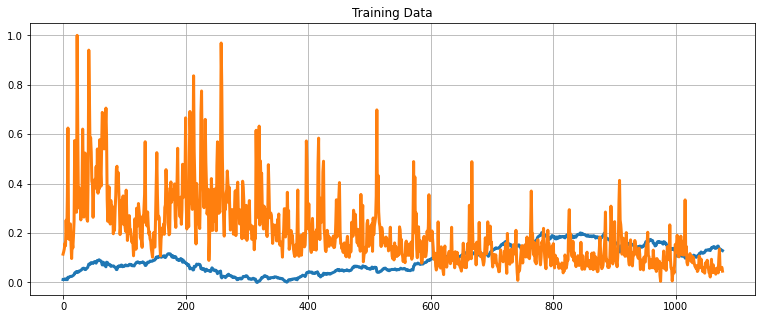

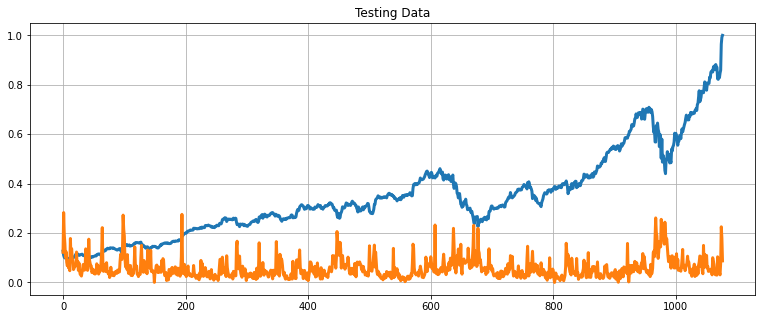

In [76]:
# Define a data plotting function

def show_plot(data, title):
  plt.figure(figsize=(13,5))
  plt.plot(data, linewidth = 3)
  plt.title(title)
  plt.grid()

show_plot(X_train, 'Training Data')
show_plot(X_test, 'Testing Data')



## RIDGE LINEAR REGRESSION MODEL (AAPL)

In [77]:
from sklearn.linear_model import Ridge

regression_model = Ridge(alpha=1)

regression_model.fit(X_train, y_train)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [78]:
predicted_prices = regression_model.predict(X)

In [79]:
predicted = []

for i in predicted_prices:
  predicted.append(i[0])

In [80]:
close = []
for i in price_volume_target_scaled_df:
  close.append(i[0])
  


In [81]:
# Create a dataframe based on the dates in the individual stock data
df_predicted = price_volume_target_df[['Date']]

In [82]:
# Add the close values to the dataframe
df_predicted['Close'] = close

In [83]:
# Add the predicted values to the dataframe
df_predicted['Prediction'] = predicted
df_predicted

Date     Close  Prediction
0     2012-01-12  0.011515    0.038784
1     2012-01-13  0.010925    0.037955
2     2012-01-17  0.012750    0.038639
3     2012-01-18  0.014395    0.038653
4     2012-01-19  0.013888    0.038797
...          ...       ...         ...
2149  2020-07-29  0.847207    0.604526
2150  2020-07-30  0.859221    0.610420
2151  2020-07-31  0.964427    0.674185
2152  2020-08-03  0.992399    0.695121
2153  2020-08-04  1.000000    0.704579

[2154 rows x 3 columns]

In [84]:
# Plot the results
plotly_plot(df_predicted, "Original vs Ridge Predictions (AAPL)")

In [85]:
# Test the model and calculate its accuracy 
lr_accuracy = regression_model.score(X_test, y_test)
print('Ridge Regression Score:', lr_accuracy)

Ridge Regression Score: 0.7251192183540008


In [86]:
rmse_ridge = sqrt(mean_squared_error(close, predicted))

print('Ridge RMSE:', rmse_ridge)

Ridge RMSE: 0.07057662079790768


## ARIMA Model (AAPL)

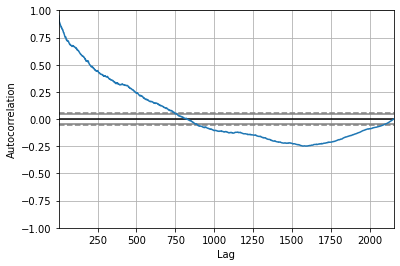

In [87]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(X)

In [88]:
history = []
for i in X_train:
  history.append(i[0])

In [89]:

predictions = []
model = ARIMA(history, order=(1,1,0))
model_fit = model.fit(disp=0)
yhat = model_fit.forecast()[0]
predictions.append(yhat)
history.append(y[0])
# rolling forecasts
for i in range(1, len(y)):
    # predict
    model = ARIMA(history, order=(1,1,0))
    model_fit = model.fit(disp=0)
    yhat = model_fit.forecast()[0]
    # invert transformed prediction
    predictions.append(yhat)
    # observation
    obs = y[i]
    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/pyth

In [90]:
# Add the close values to the dataframe
df_predicted_arima = df_predicted

In [91]:
predictions_arima = []
for i in predictions:
  predictions_arima.append(i[0])

In [92]:
df_predicted_arima['Prediction'] = predictions_arima
df_predicted_arima

Date     Close  Prediction
0     2012-01-12  0.011515    0.128854
1     2012-01-13  0.010925    0.009783
2     2012-01-17  0.012750    0.013165
3     2012-01-18  0.014395    0.010690
4     2012-01-19  0.013888    0.020002
...          ...       ...         ...
2149  2020-07-29  0.847207    0.957109
2150  2020-07-30  0.859221    0.961462
2151  2020-07-31  0.964427    0.996035
2152  2020-08-03  0.992399    0.975697
2153  2020-08-04  1.000000    0.986654

[2154 rows x 3 columns]

In [93]:
# Plot the results
plotly_plot(df_predicted_arima, "Original vs Predictions")

In [94]:
rmse_arima = sqrt(mean_squared_error(close, predictions_arima))
rmse_arima

0.01740295017595933

## LSTM TIME SERIES MODEL (AAPL)

In [95]:
# Convert the data into array format
X = np.asarray(X)
y = np.asarray(y)

In [96]:
# Split the data
split = int(0.5 * len(X))
X_train = X[:split]
y_train = y[:split]
X_test = X[split:]
y_test = y[split:]

In [97]:
# Reshape the 1D arrays to 3D arrays to feed in the model
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [98]:
X = np.reshape(X, (X.shape[0], 1, X.shape[1]))

In [99]:
# Create the model

# sequential layer
inputs = keras.layers.Input(shape=(X_train.shape[1], X_train.shape[2]))
x = keras.layers.LSTM(25, return_sequences= True)(inputs)
x = keras.layers.Dropout(0.25)(x)
x = keras.layers.LSTM(25, return_sequences=True)(x)
x = keras.layers.Dropout(0.25)(x)
x = keras.layers.LSTM(25)(x)
outputs = keras.layers.Dense(1, activation='relu')(x)

model = keras.Model(inputs = inputs, outputs = outputs)
model.compile(optimizer = 'adam', loss='mse')
model.summary()


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 1, 2)]            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 1, 25)             2800      
_________________________________________________________________
dropout_2 (Dropout)          (None, 1, 25)             0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 1, 25)             5100      
_________________________________________________________________
dropout_3 (Dropout)          (None, 1, 25)             0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 25)                5100      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 26  

In [100]:
# Train the model
history = model.fit(X_train, y_train, epochs = 25, batch_size = 32, validation_split = 0.2)

Epoch 1/25
27/27 [==============================] - 6s 49ms/step - loss: 0.0064 - val_loss: 0.0038
Epoch 2/25
27/27 [==============================] - 0s 6ms/step - loss: 0.0025 - val_loss: 0.0038
Epoch 3/25
27/27 [==============================] - 0s 7ms/step - loss: 0.0025 - val_loss: 0.0040
Epoch 4/25
27/27 [==============================] - 0s 6ms/step - loss: 0.0023 - val_loss: 0.0029
Epoch 5/25
27/27 [==============================] - 0s 7ms/step - loss: 0.0020 - val_loss: 0.0018
Epoch 6/25
27/27 [==============================] - 0s 7ms/step - loss: 0.0014 - val_loss: 6.9445e-04
Epoch 7/25
27/27 [==============================] - 0s 7ms/step - loss: 0.0010 - val_loss: 3.8409e-04
Epoch 8/25
27/27 [==============================] - 0s 7ms/step - loss: 6.8506e-04 - val_loss: 2.0286e-04
Epoch 9/25
27/27 [==============================] - 0s 7ms/step - loss: 3.7439e-04 - val_loss: 1.3326e-04
Epoch 10/25
27/27 [==============================] - 0s 6ms/step - loss: 2.6268e-04 - val_los

In [101]:
# Make prediction
predictions = model.predict(X)

In [102]:
test_predicted_lstm = []
for i in predictions:
  test_predicted_lstm.append(i[0])

In [103]:
df_predicted_lstm = price_volume_target_df[['Date']]

In [104]:
df_predicted_lstm['Predictions'] = test_predicted_lstm

In [105]:
close = []
for i in price_volume_target_scaled_df:
  close.append(i[0])

In [106]:
df_predicted_lstm['Close'] = close

In [107]:
df_predicted_lstm

Date  Predictions     Close
0     2012-01-12     0.016577  0.011515
1     2012-01-13     0.015951  0.010925
2     2012-01-17     0.017424  0.012750
3     2012-01-18     0.018620  0.014395
4     2012-01-19     0.018284  0.013888
...          ...          ...       ...
2149  2020-07-29     0.833438  0.847207
2150  2020-07-30     0.845944  0.859221
2151  2020-07-31     0.943366  0.964427
2152  2020-08-03     0.965090  0.992399
2153  2020-08-04     0.967849  1.000000

[2154 rows x 3 columns]

In [108]:
plotly_plot(df_predicted_lstm, 'Original Price vs LSTM Predictions LSTM (AAPL)')

In [109]:
rmse_lstm = sqrt(mean_squared_error(close, test_predicted_lstm))

print('LSTM RMSE:', rmse_lstm)

LSTM RMSE: 0.006210237180003155


## Result (AAPL)

In [110]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Table(header=dict(values=['Model', 'RMSE']),
                 cells=dict(values=[['Ridge (AAPL)', 'ARIMA (AAPL)', 'LSTM (AAPL)'], [rmse_ridge, rmse_arima, rmse_lstm]]))
                     ])
fig.show()

## PREPARE THE DATA (IBM)

In [111]:
# individual stock prices and volumes for IBM
price_volume_df = individual_stock(stock_price_df, stock_vol_df, 'IBM')
price_volume_df 

Date       Close   Volume
0     2012-01-12  180.550003  6881000
1     2012-01-13  179.160004  5279200
2     2012-01-17  180.000000  6003400
3     2012-01-18  181.070007  4600600
4     2012-01-19  180.520004  8567200
...          ...         ...      ...
2154  2020-08-05  125.449997  3675400
2155  2020-08-06  126.120003  3417100
2156  2020-08-07  124.959999  3651000
2157  2020-08-10  127.110001  3968300
2158  2020-08-11  126.750000  4998500

[2159 rows x 3 columns]

In [112]:
price_volume_target_df = trading_window(price_volume_df)

# Remove the last 5 rows as it will be a null value
price_volume_target_df = price_volume_target_df[:-5]
price_volume_target_df

Date       Close   Volume      Target
0     2012-01-12  180.550003  6881000  188.520004
1     2012-01-13  179.160004  5279200  189.979996
2     2012-01-17  180.000000  6003400  191.929993
3     2012-01-18  181.070007  4600600  191.729996
4     2012-01-19  180.520004  8567200  190.979996
...          ...         ...      ...         ...
2149  2020-07-29  125.320000  2832800  125.449997
2150  2020-07-30  122.900002  3988100  126.120003
2151  2020-07-31  122.940002  5277700  124.959999
2152  2020-08-03  124.309998  3526100  127.110001
2153  2020-08-04  125.839996  3466100  126.750000

[2154 rows x 4 columns]

In [113]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
price_volume_target_scaled_df = sc.fit_transform(price_volume_target_df.drop(columns=['Date']))

In [114]:
price_volume_target_scaled_df

array([[0.70874991, 0.19414825, 0.77460136],
       [0.69726516, 0.13947408, 0.78666442],
       [0.70420556, 0.16419317, 0.8027761 ],
       ...,
       [0.23275224, 0.13942288, 0.24944229],
       [0.24407171, 0.0796356 , 0.2672065 ],
       [0.25671319, 0.07758762, 0.26423202]])

In [115]:
# Create Feature and Target
X = price_volume_target_scaled_df[:, 0:2]
y = price_volume_target_scaled_df[:, 2:]

In [116]:
split = int(0.5 * len(X))

In [117]:
X_train = X[:split]
y_train = y[:split]
X_test = X[split:]
y_test = y[split:]


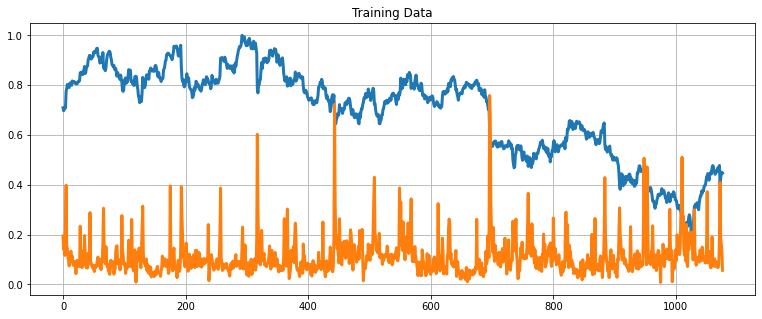

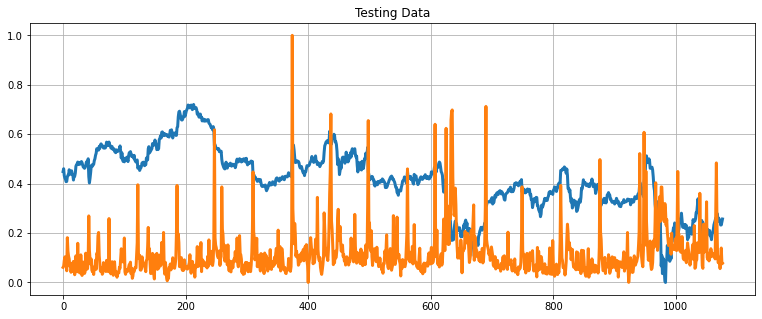

In [118]:
# Define a data plotting function

def show_plot(data, title):
  plt.figure(figsize=(13,5))
  plt.plot(data, linewidth = 3)
  plt.title(title)
  plt.grid()

show_plot(X_train, 'Training Data')
show_plot(X_test, 'Testing Data')



## RIDGE LINEAR REGRESSION MODEL (IBM)

In [119]:
from sklearn.linear_model import Ridge

regression_model = Ridge(alpha=1)

regression_model.fit(X_train, y_train)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [120]:
predicted_prices = regression_model.predict(X)

In [121]:
predicted = []

for i in predicted_prices:
  predicted.append(i[0])

In [122]:
close = []
for i in price_volume_target_scaled_df:
  close.append(i[0])
  


In [123]:
# Create a dataframe based on the dates in the individual stock data
df_predicted = price_volume_target_df[['Date']]

In [124]:
# Add the close values to the dataframe
df_predicted['Close'] = close

In [125]:
# Add the predicted values to the dataframe
df_predicted['Prediction'] = predicted
df_predicted

Date     Close  Prediction
0     2012-01-12  0.708750    0.707678
1     2012-01-13  0.697265    0.696173
2     2012-01-17  0.704206    0.703047
3     2012-01-18  0.713046    0.711055
4     2012-01-19  0.708502    0.707984
...          ...       ...         ...
2149  2020-07-29  0.252417    0.269715
2150  2020-07-30  0.232422    0.250954
2151  2020-07-31  0.232752    0.251686
2152  2020-08-03  0.244072    0.261953
2153  2020-08-04  0.256713    0.274030

[2154 rows x 3 columns]

In [126]:
# Plot the results
plotly_plot(df_predicted, "Original vs Ridge Predictions (IBM)")

In [127]:
# Test the model and calculate its accuracy 
lr_accuracy = regression_model.score(X_test, y_test)
print('Ridge Regression Score:', lr_accuracy)

Ridge Regression Score: 0.9005035709925844


In [128]:
rmse_ridge = sqrt(mean_squared_error(close, predicted))

print('Ridge RMSE:', rmse_ridge)

Ridge RMSE: 0.010416506400096911


## ARIMA Model (IBM)

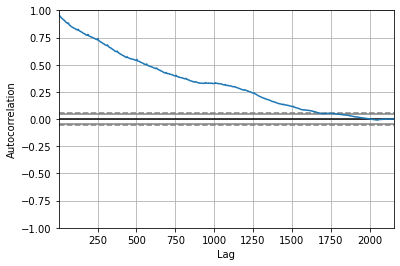

In [129]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(X)

In [130]:
history = []
for i in X_train:
  history.append(i[0])

In [131]:

predictions = []
model = ARIMA(history, order=(1,1,0))
model_fit = model.fit(disp=0)
yhat = model_fit.forecast()[0]
predictions.append(yhat)
history.append(y[0])
# rolling forecasts
for i in range(1, len(y)):
    # predict
    model = ARIMA(history, order=(1,1,0))
    model_fit = model.fit(disp=0)
    yhat = model_fit.forecast()[0]
    # invert transformed prediction
    predictions.append(yhat)
    # observation
    obs = y[i]
    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/pyth

In [132]:
# Add the close values to the dataframe
df_predicted_arima = df_predicted

In [133]:
predictions_arima = []
for i in predictions:
  predictions_arima.append(i[0])

In [134]:
df_predicted_arima['Prediction'] = predictions_arima
df_predicted_arima

Date     Close  Prediction
0     2012-01-12  0.708750    0.446349
1     2012-01-13  0.697265    0.786367
2     2012-01-17  0.704206    0.787167
3     2012-01-18  0.713046    0.803445
4     2012-01-19  0.708502    0.801146
...          ...       ...         ...
2149  2020-07-29  0.252417    0.256589
2150  2020-07-30  0.232422    0.253346
2151  2020-07-31  0.232752    0.258894
2152  2020-08-03  0.244072    0.249289
2153  2020-08-04  0.256713    0.267088

[2154 rows x 3 columns]

In [135]:
# Plot the results
plotly_plot(df_predicted_arima, "Original vs Predictions")

In [136]:
rmse_arima = sqrt(mean_squared_error(close, predictions_arima))
rmse_arima

0.03574795070044315

## LSTM TIME SERIES MODEL (IBM)

In [137]:
# Convert the data into array format
X = np.asarray(X)
y = np.asarray(y)

In [138]:
# Split the data
split = int(0.5 * len(X))
X_train = X[:split]
y_train = y[:split]
X_test = X[split:]
y_test = y[split:]

In [139]:
# Reshape the 1D arrays to 3D arrays to feed in the model
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [140]:
X = np.reshape(X, (X.shape[0], 1, X.shape[1]))

In [141]:
# Create the model

# sequential layer
inputs = keras.layers.Input(shape=(X_train.shape[1], X_train.shape[2]))
x = keras.layers.LSTM(25, return_sequences= True)(inputs)
x = keras.layers.Dropout(0.25)(x)
x = keras.layers.LSTM(25, return_sequences=True)(x)
x = keras.layers.Dropout(0.25)(x)
x = keras.layers.LSTM(25)(x)
outputs = keras.layers.Dense(1, activation='relu')(x)

model = keras.Model(inputs = inputs, outputs = outputs)
model.compile(optimizer = 'adam', loss='mse')
model.summary()


Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 1, 2)]            0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 1, 25)             2800      
_________________________________________________________________
dropout_4 (Dropout)          (None, 1, 25)             0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 1, 25)             5100      
_________________________________________________________________
dropout_5 (Dropout)          (None, 1, 25)             0         
_________________________________________________________________
lstm_8 (LSTM)                (None, 25)                5100      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 26  

In [142]:
# Train the model
history = model.fit(X_train, y_train, epochs = 25, batch_size = 32, validation_split = 0.2)

Epoch 1/25
27/27 [==============================] - 6s 48ms/step - loss: 0.5710 - val_loss: 0.1094
Epoch 2/25
27/27 [==============================] - 0s 6ms/step - loss: 0.4178 - val_loss: 0.0235
Epoch 3/25
27/27 [==============================] - 0s 7ms/step - loss: 0.1395 - val_loss: 0.0835
Epoch 4/25
27/27 [==============================] - 0s 6ms/step - loss: 0.0190 - val_loss: 0.0514
Epoch 5/25
27/27 [==============================] - 0s 7ms/step - loss: 0.0165 - val_loss: 0.0606
Epoch 6/25
27/27 [==============================] - 0s 6ms/step - loss: 0.0161 - val_loss: 0.0586
Epoch 7/25
27/27 [==============================] - 0s 6ms/step - loss: 0.0135 - val_loss: 0.0590
Epoch 8/25
27/27 [==============================] - 0s 6ms/step - loss: 0.0142 - val_loss: 0.0577
Epoch 9/25
27/27 [==============================] - 0s 7ms/step - loss: 0.0142 - val_loss: 0.0524
Epoch 10/25
27/27 [==============================] - 0s 7ms/step - loss: 0.0123 - val_loss: 0.0550
Epoch 11/25
27/27 

In [143]:
# Make prediction
predictions = model.predict(X)

In [144]:
test_predicted_lstm = []
for i in predictions:
  test_predicted_lstm.append(i[0])

In [145]:
df_predicted_lstm = price_volume_target_df[['Date']]

In [146]:
df_predicted_lstm['Predictions'] = test_predicted_lstm

In [147]:
close = []
for i in price_volume_target_scaled_df:
  close.append(i[0])

In [148]:
df_predicted_lstm['Close'] = close

In [149]:
df_predicted_lstm

Date  Predictions     Close
0     2012-01-12     0.707420  0.708750
1     2012-01-13     0.710364  0.697265
2     2012-01-17     0.710106  0.704206
3     2012-01-18     0.723833  0.713046
4     2012-01-19     0.696703  0.708502
...          ...          ...       ...
2149  2020-07-29     0.490423  0.252417
2150  2020-07-30     0.475666  0.232422
2151  2020-07-31     0.469310  0.232752
2152  2020-08-03     0.483190  0.244072
2153  2020-08-04     0.489206  0.256713

[2154 rows x 3 columns]

In [150]:
plotly_plot(df_predicted_lstm, 'Original Price vs LSTM Predictions LSTM (IBM)')

In [151]:
rmse_lstm = sqrt(mean_squared_error(close, test_predicted_lstm))

print('LSTM RMSE:', rmse_lstm)

LSTM RMSE: 0.1266855800030784


## Result (IBM)

In [152]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Table(header=dict(values=['Model', 'RMSE']),
                 cells=dict(values=[['Ridge (IBM)', 'ARIMA (IBM)', 'LSTM (IBM)'], [rmse_ridge, rmse_arima, rmse_lstm]]))
                     ])
fig.show()